In [13]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

TODO

- we need a figure on the link capacity for the two technologies from 0 to 10km
like:
- figure on pathloss with 60 GHz and 70GHz with and without GAL
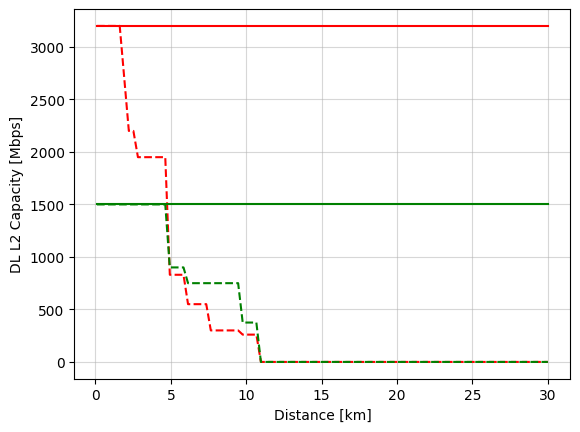
- distribution of MCS to justify the max_bw value a posteriori
- figure with number of antennas to justify that we pick C_s=100

/home/gabriel/git/ODCM/analysis/params.py:33: RuntimeWarning: divide by zero encountered in log10
  pl = 38+25*np.log10(d)
/home/gabriel/git/ODCM/analysis/params.py:28: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(d/1000) + 20*np.log10(self.f_c) + 92.45 + self.get_oal(self.f_c)
/home/gabriel/git/ODCM/analysis/params.py:38: RuntimeWarning: divide by zero encountered in log10
  pl = 21.8+33*np.log10(d)


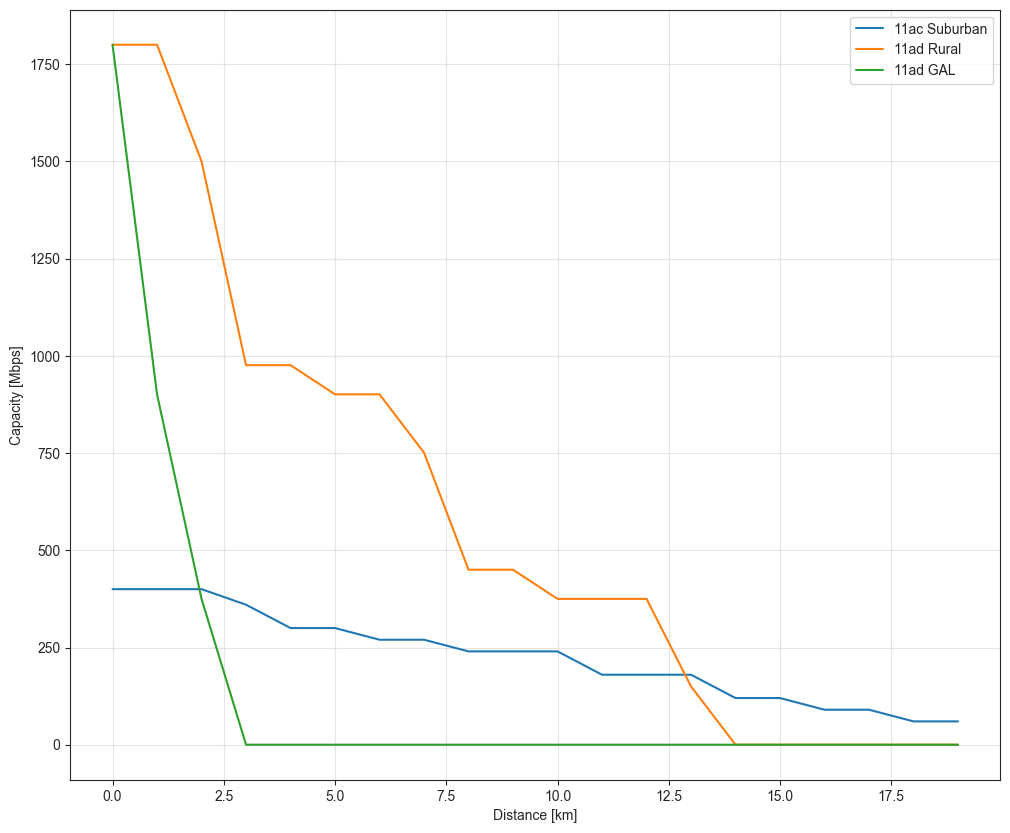

In [14]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')
p_ac.pl_function = p_ac.pl_wifi
ca_ac = CapacityAnalysis(p_ac)

p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')
ca_ad = CapacityAnalysis(p_ad)


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c = 60
ca_ad_gal = CapacityAnalysis(p_ad_gal)



p_ac_rural = Params()
p_ac_rural.set_radio(type='802.11ac')
p_ac_rural.pl_function = p_ac_rural.pl_wifi_rural
ca_ac_rural = CapacityAnalysis(p_ac_rural)



p_ac_fs = Params()
p_ac_fs.set_radio(type='802.11ac')
p_ac_fs.pl_function = p_ac_fs.pl_fs
ca_ac_fs = CapacityAnalysis(p_ac_fs)


dists = np.array(range(0,20000, 1000))
speeds_11ac = np.zeros_like(dists)
speeds_11ad = np.zeros_like(dists)
speeds_11ad_gal = np.zeros_like(dists)
speeds_11ac_rural = np.zeros_like(dists)
speeds_11ac_fs = np.zeros_like(dists)


for i,d in enumerate(dists):
    speeds_11ac[i] = ca_ac.calc_capacity(d)
    speeds_11ad[i] = ca_ad.calc_capacity(d)
    speeds_11ad_gal[i] = ca_ad_gal.calc_capacity(d)
    speeds_11ac_fs[i] = ca_ac_fs.calc_capacity(d)
    speeds_11ac_rural[i] = ca_ac_rural.calc_capacity(d)

plt.plot(dists/1000,speeds_11ac, label="11ac Suburban")
plt.plot(dists/1000,speeds_11ad, label="11ad Rural")
plt.plot(dists/1000,speeds_11ad_gal, label="11ad GAL")
#plt.plot(dists/1000,speeds_11ac_fs, label="802.11ac fspl")
#plt.plot(dists/1000,speeds_11ac_rural, label="802.11ac rural")

plt.xlabel("Distance [km]")
plt.ylabel("Capacity [Mbps]")
plt.legend()
plt.grid(alpha=0.5)
#plt.ylim(0,500)
plt.savefig("figures/capacity.pdf")

/home/gabriel/git/ODCM/analysis/params.py:33: RuntimeWarning: divide by zero encountered in log10
  pl = 38+25*np.log10(d)
/home/gabriel/git/ODCM/analysis/params.py:28: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(d/1000) + 20*np.log10(self.f_c) + 92.45 + self.get_oal(self.f_c)
/home/gabriel/git/ODCM/analysis/params.py:38: RuntimeWarning: divide by zero encountered in log10
  pl = 21.8+33*np.log10(d)


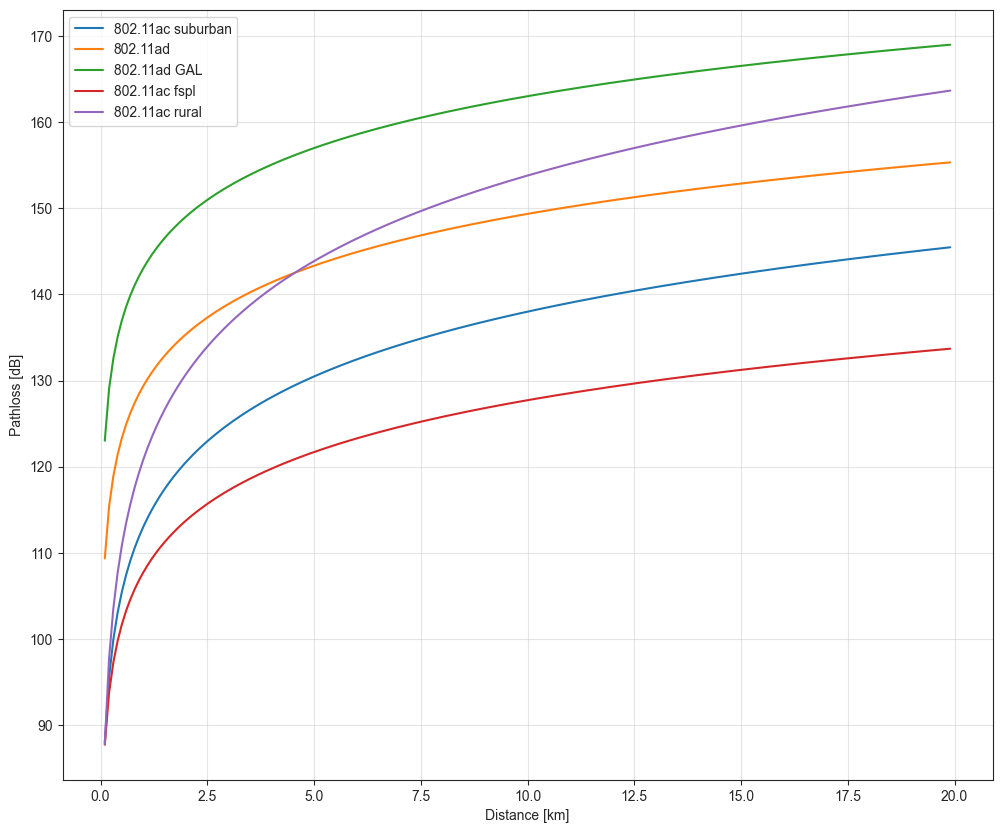

In [45]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')


p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c=60


dists = np.array(range(0,20000, 100))
pl_11ac = np.zeros_like(dists, dtype=np.float32)
pl_11ad = np.zeros_like(dists, dtype=np.float32)
pl_11ad_gal = np.zeros_like(dists, dtype=np.float32)
pl_11ac_rural = np.zeros_like(dists, dtype=np.float32)
pl_11ac_fs = np.zeros_like(dists, dtype=np.float32)



for i,d in enumerate(dists):
    pl_11ac[i] = p_ac.pl_wifi(d)
    pl_11ad[i] = p_ad.pl_fs(d)
    pl_11ad_gal[i] = p_ad_gal.pl_fs(d)
    pl_11ac_rural[i] = p_ac.pl_wifi_rural(d)
    pl_11ac_fs[i] = p_ac.pl_fs(d)


plt.plot(dists/1000,pl_11ac, label="802.11ac suburban")
plt.plot(dists/1000,pl_11ad, label="802.11ad")
plt.plot(dists/1000,pl_11ad_gal, label="802.11ad GAL")
plt.plot(dists/1000,pl_11ac_fs, label="802.11ac fspl")
plt.plot(dists/1000,pl_11ac_rural, label="802.11ac rural")

plt.xlabel("Distance [km]")
plt.ylabel("Pathloss [dB]")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("figures/pathloss.pdf")

In [46]:
bws = []
costs = []
n_ant = []
capexes = []
for dev in ['802.11ac', '802.11ad_pro']:
    bw_f = glob.glob(f'processed/{dev}/bw*.csv')
    cost_f = glob.glob(f'processed/{dev}/costs*.csv')
    n_ant_f = glob.glob(f'processed/{dev}/n_ant*.csv')
    capex_f = glob.glob(f'processed/{dev}/capex**.csv')

    for f in bw_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        bws.append(df)
    
    for f in cost_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#cluster_size": "cluster_size"}, inplace=True)
        costs.append(df)
    
    for f in n_ant_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        n_ant.append(df)
    
    for f in capex_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        capexes.append(df)


bw_df = pd.concat(bws)
costs_df = pd.concat(costs)
n_ant_df = pd.concat(n_ant)
capex_df = pd.concat(capexes)
costs_df.set_index(['cluster_size', 'mgb', 'ratio', "device"], inplace=True)
bw_df.set_index(["cluster_size", "mgb", "ratio", "device"], inplace=True)
#Fix sum that was missing the power consumption
costs_df['correct_sum'] = costs_df.fiber_cost_mean + costs_df.transport_cost_mean + costs_df.unplanned_cost_mean  + costs_df.power_consumption_mean +costs_df.capex_mean

In [47]:
costs_df

fiber_cost_mean  fiber_cost_ci  \
cluster_size mgb ratio device                                         
50           30  25    802.11ac             4.905921       0.057350   
                 50    802.11ac             4.679679       0.037043   
                 100   802.11ac             4.642807       0.048133   
100          30  25    802.11ac             5.184695       0.085964   
                 50    802.11ac             4.654472       0.046220   
...                                              ...            ...   
             40  50    802.11ad_pro         6.170537       0.054933   
                 100   802.11ad_pro         6.050305       0.035679   
200          40  25    802.11ad_pro         6.509293       0.099897   
                 50    802.11ad_pro         6.496719       0.089050   
                 100   802.11ad_pro         6.020147       0.041209   

                                     transport_cost_mean  transport_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                13.315624           0.427628   
                 50    802.11ac                 7.814568           0.323284   
                 100   802.11ac                 5.405731           0.306170   
100          30  25    802.11ac                14.311969           0.542339   
                 50    802.11ac                 7.668234           0.337882   
...                                                  ...                ...   
             40  50    802.11ad_pro             9.160530           0.483075   
                 100   802.11ad_pro             4.854979           0.209519   
200          40  25    802.11ad_pro            13.400680           0.473633   
                 50    802.11ad_pro             9.978443           0.589226   
                 100   802.11ad_pro             4.866431           0.213968   

                                     unplanned_cost_mean  unplanned_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                 1.521397           0.015011   
                 50    802.11ac                 1.286172           0.012175   
                 100   802.11ac                 1.019503           0.012129   
100          30  25    802.11ac                 1.550645           0.020774   
                 50    802.11ac                 1.340244           0.014016   
...                                                  ...                ...   
             40  50    802.11ad_pro             1.296020           0.013627   
                 100   802.11ad_pro             0.990904           0.010949   
200          40  25    802.11ad_pro             1.614121           0.021307   
                 50    802.11ad_pro             1.285879           0.016812   
                 100   802.11ad_pro             1.008444           0.011198   

                                     power_consumption_mean  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                    5.879697   
                 50    802.11ac                    5.088415   
                 100   802.11ac                    4.156224   
100          30  25    802.11ac                    5.716757   
                 50    802.11ac                    4.889638   
...                                                     ...   
             40  50    802.11ad_pro                4.738358   
                 100   802.11ad_pro                3.731066   
200          40  25    802.11ad_pro                5.513822   
                 50    802.11ad_pro                4.645390   
                 100   802.11ad_pro                3.616174   

                                     power_consumption_ci  capex_mean  \
cluster_size mgb ratio device                                           
50           30  25    802.11ac                  0.036978   18.629716   
                 5

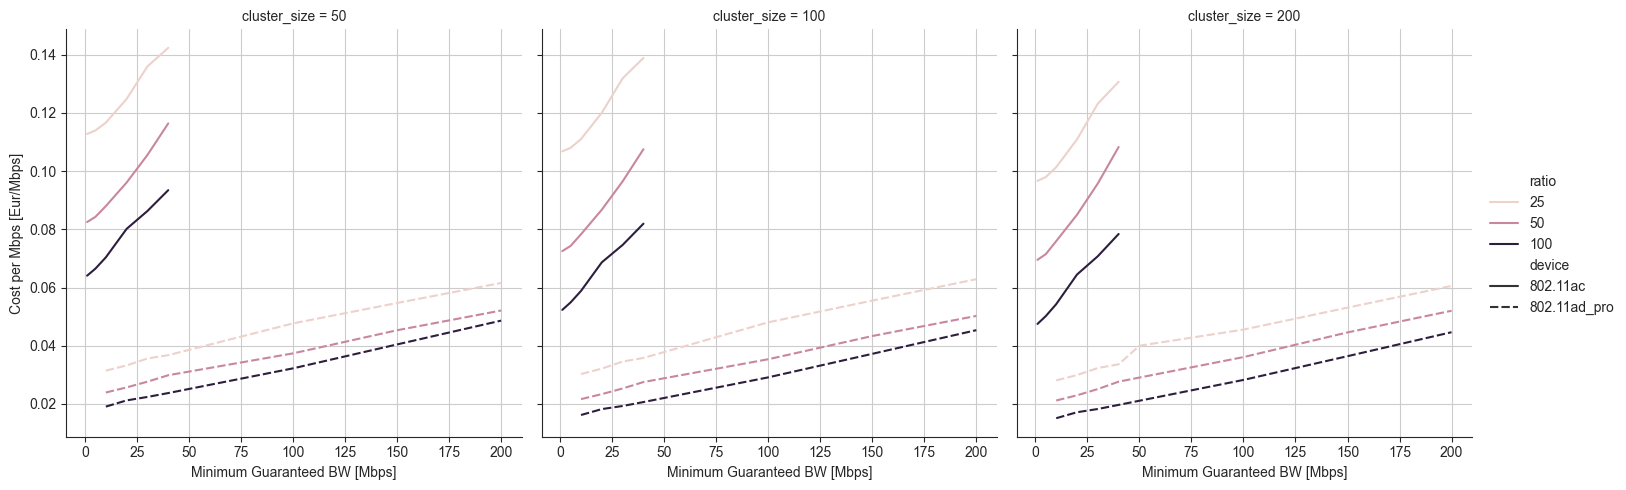

In [48]:
cost_mbps1 = (costs_df['correct_sum']/bw_df[bw_df.bw_type=='max'].bw).to_frame(name="cost/mbps")
cost_mbps1.reset_index(inplace=True)
fg = sns.relplot(data=cost_mbps1, x='mgb', hue='ratio', kind='line', style='device', y='cost/mbps', col='cluster_size',)
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("Cost per Mbps [Eur/Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

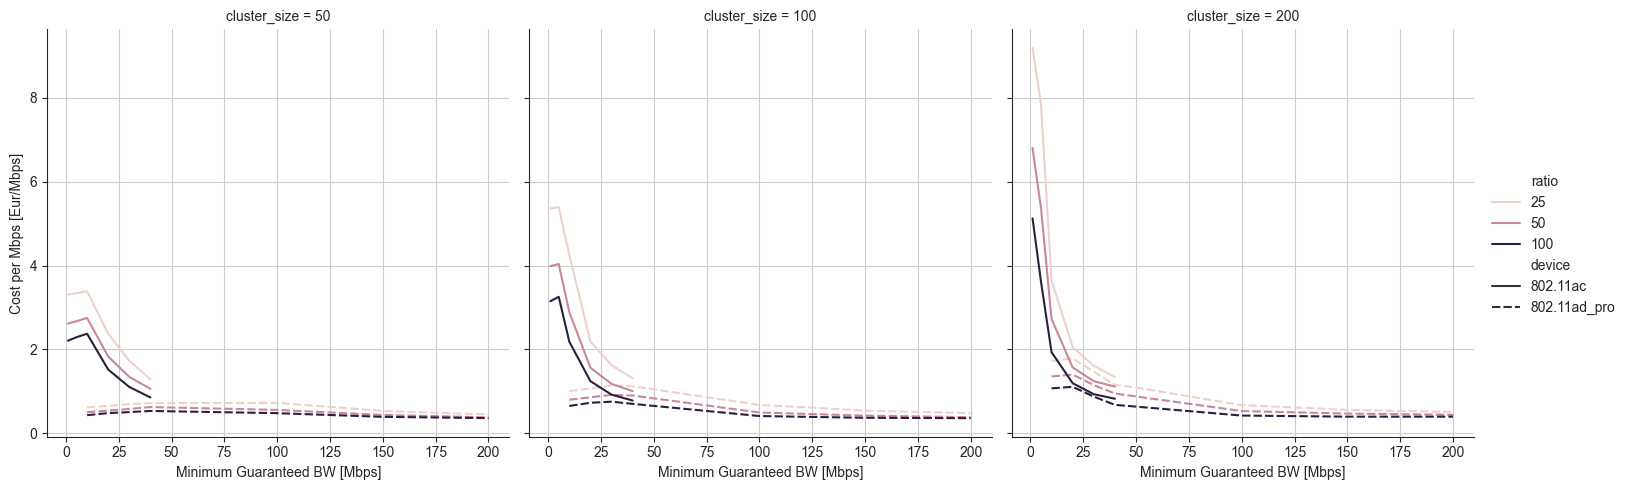

In [49]:
cost_mbps = (costs_df['correct_sum']/bw_df[bw_df.bw_type=='min'].bw).to_frame(name="cost/mbps")
cost_mbps.reset_index(inplace=True)
fg = sns.relplot(data=cost_mbps, x='mgb', hue='ratio', kind='line', style='device', y='cost/mbps', col='cluster_size',)
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("Cost per Mbps [Eur/Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")


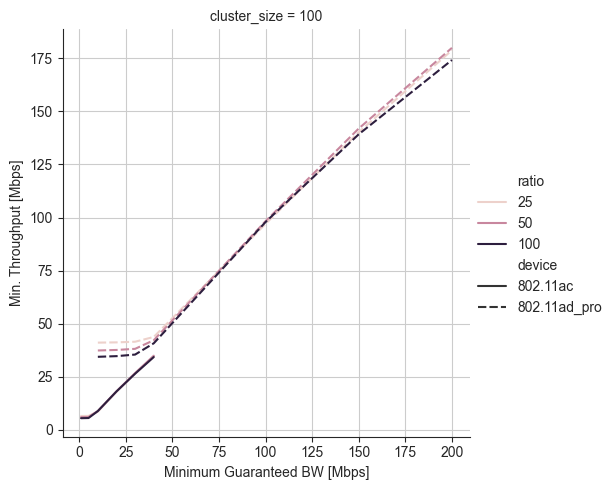

In [50]:
bw_df = bw_df.reset_index()
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=bw_df[(bw_df.cluster_size==100)& (bw_df.bw_type=='min')], x='mgb', hue='ratio', kind='line', col='cluster_size', style='device', y='bw', facet_kws={'sharey': False, 'sharex': True})

fg.set_ylabels("Min. Throughput [Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

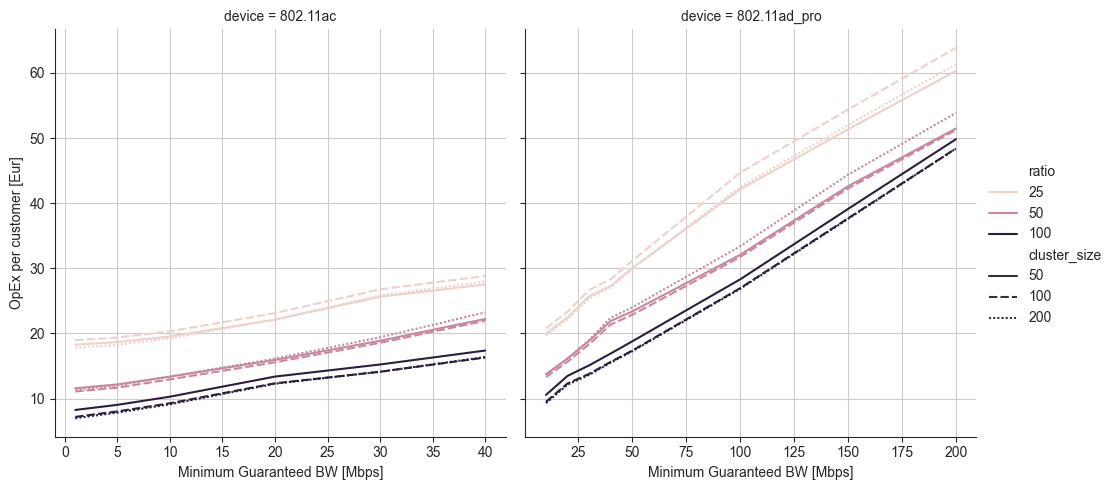

In [51]:
costs_df['opex'] = (costs_df['correct_sum']-costs_df['capex_mean']).to_frame(name="opex")

fg = sns.relplot(data=costs_df, x='mgb', hue='ratio', kind='line', col='device', y='opex', style='cluster_size',facet_kws={'sharey': True, 'sharex': False})
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("OpEx per customer [Eur]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

plt.savefig("figures/opex.pdf")

/home/gabriel/Envs/odcm/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/gabriel/Envs/odcm/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


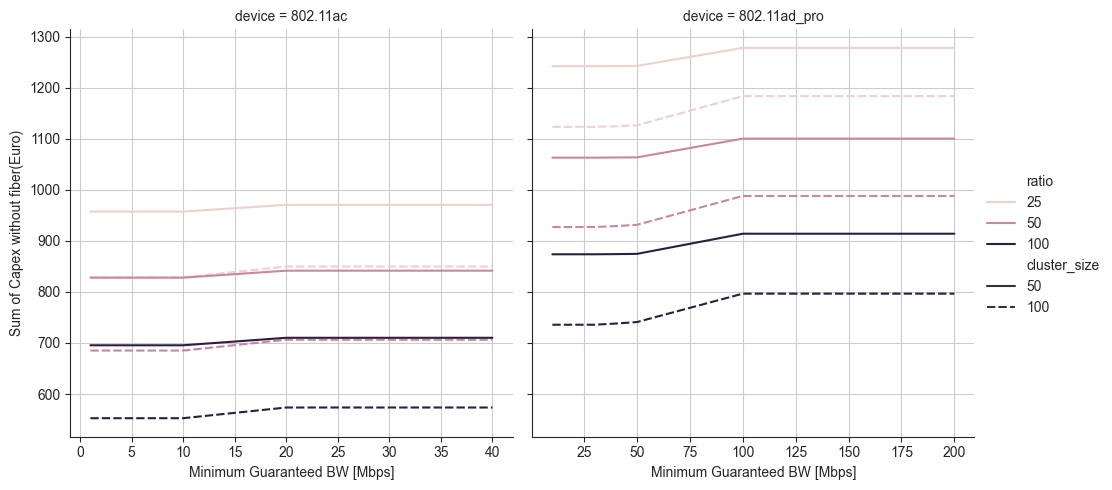

In [52]:

t_df = capex_df.set_index(['area', 'ratio', 'cluster_size', 'mgb', 'device'])
pvt = capex_df.pivot_table(index=['area', 'ratio', 'cluster_size', 'mgb', 'device'], columns='type_cost', values='5ymontlycostcustomer')
pvt['mesh_cost'] = (pvt.deploy + pvt.radio_cost + pvt.router_cost)*60

new_df = pvt.mesh_cost.reset_index()

fg = sns.relplot(data=new_df[(new_df.cluster_size<200)], x='mgb', hue='ratio', y='mesh_cost', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False}, ci=None)
fg.set_ylabels("Sum of Capex without fiber(Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/capex_nofiber.pdf")

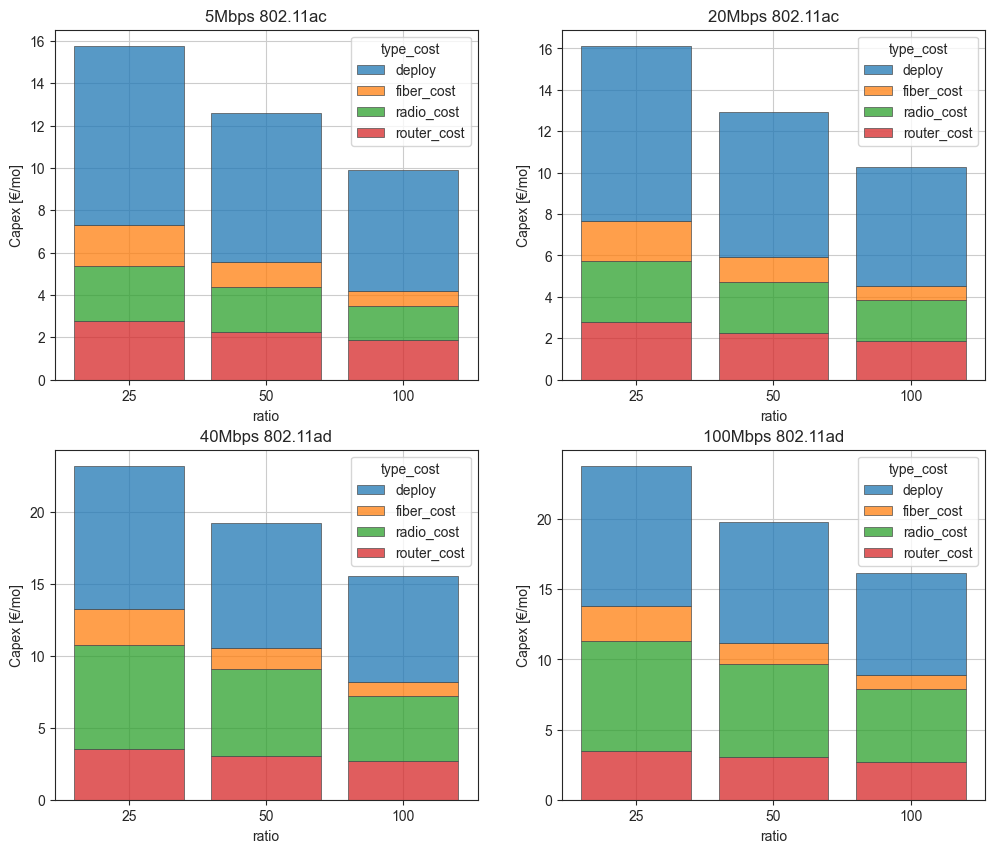

In [79]:
aggreg_capex = capex_df.groupby(['ratio', 'type_cost', 'mgb', 'device', 'cluster_size'])['5ymontlycostcustomer'].mean().to_frame()
aggreg_capex.reset_index(inplace=True)
aggreg_capex['ratio'] = pd.Categorical(aggreg_capex['ratio'].astype(str), [str(x) for x in sorted(aggreg_capex.ratio.unique())])

plt.rcParams['figure.figsize'] = [12, 10]

ax = plt.subplot(2,2,1)
sns.histplot(data=aggreg_capex[(aggreg_capex.mgb==5) & (aggreg_capex.device=='802.11ac') & (aggreg_capex.cluster_size==100)], x='ratio', hue='type_cost', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='5ymontlycostcustomer', shrink=0.8, ax=ax)
ax.set_ylabel("Capex [€/mo]")
ax.set_title("5Mbps 802.11ac")

ax = plt.subplot(2,2,2)
sns.histplot(data=aggreg_capex[(aggreg_capex.mgb==20) & (aggreg_capex.device=='802.11ac') & (aggreg_capex.cluster_size==100)], x='ratio', hue='type_cost', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='5ymontlycostcustomer', shrink=0.8, ax=ax)
ax.set_ylabel("Capex [€/mo]")
ax.set_title("20Mbps 802.11ac")

ax = plt.subplot(2,2,3)
sns.histplot(data=aggreg_capex[(aggreg_capex.mgb==40) & (aggreg_capex.device=='802.11ad_pro') & (aggreg_capex.cluster_size==50)], x='ratio', hue='type_cost', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='5ymontlycostcustomer', shrink=0.8, ax=ax)
ax.set_ylabel("Capex [€/mo]")
ax.set_title("40Mbps 802.11ad")

ax = plt.subplot(2,2,4)
sns.histplot(data=aggreg_capex[(aggreg_capex.mgb==100) & (aggreg_capex.device=='802.11ad_pro') & (aggreg_capex.cluster_size==50)], x='ratio', hue='type_cost', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='5ymontlycostcustomer', shrink=0.8, ax=ax)
ax.set_ylabel("Capex [€/mo]")
ax.set_title("100Mbps 802.11ad")
plt.savefig('figures/capex_acad.pdf')


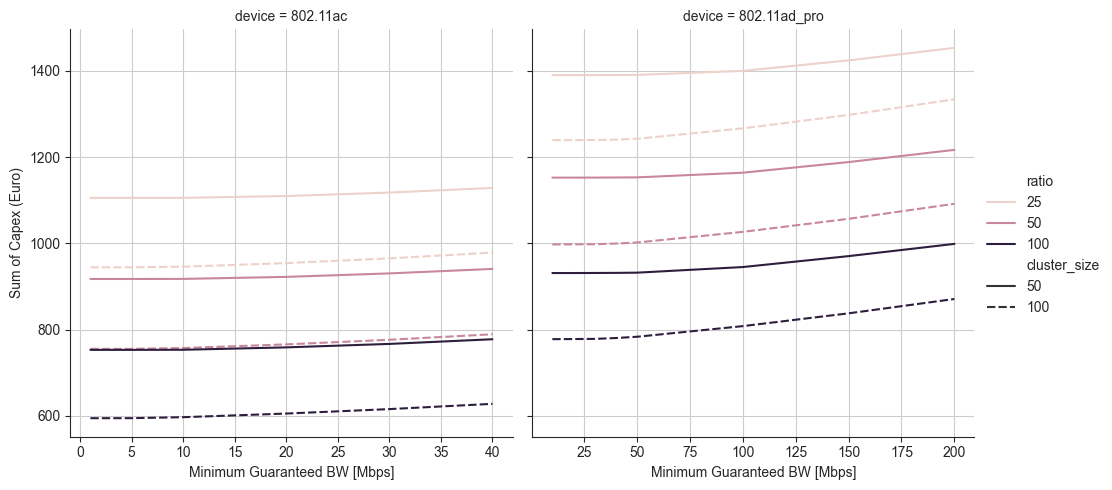

In [54]:
#sns.set_style("ticks",{'axes.grid' : True
costs_df.reset_index(inplace=True)
costs_df['capex_mean_subs'] = costs_df.capex_mean*60
fg = sns.relplot(data=costs_df[(costs_df.cluster_size<200)], x='mgb', hue='ratio', y='capex_mean_subs', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum of Capex (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/capex.pdf")

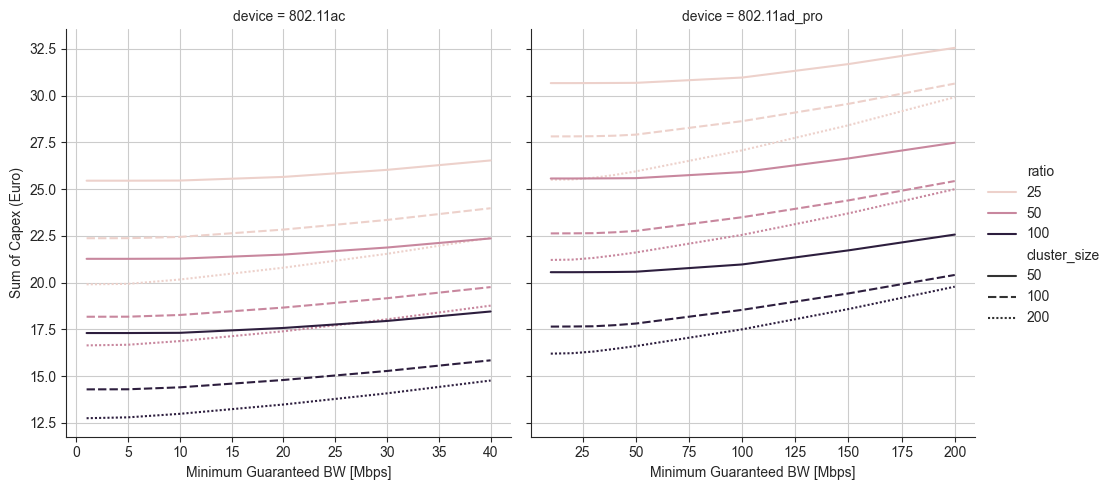

In [72]:
#sns.set_style("ticks",{'axes.grid' : True
costs_df['nofiber'] = (costs_df['correct_sum']-costs_df['fiber_cost_mean']-costs_df['transport_cost_mean']).to_frame(name="opex")

costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=50)], x='mgb', hue='ratio', y='nofiber', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum of Capex (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/costs_nofiber.pdf")

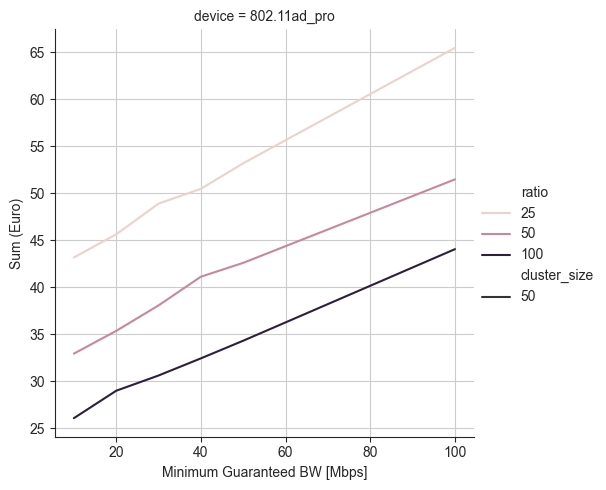

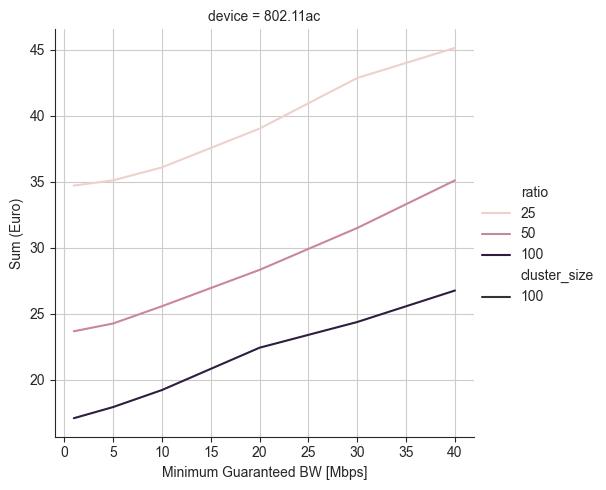

In [71]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size==50) & (costs_df.device=='802.11ad_pro') & (costs_df.mgb<=100)], x='mgb', hue='ratio', y='correct_sum', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/costs_ad.pdf")


fg = sns.relplot(data=costs_df[(costs_df.cluster_size==100) & (costs_df.device=='802.11ac')], x='mgb', hue='ratio', y='correct_sum', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/costs_ac.pdf")

In [57]:
rotated_df[(rotated_df.mgb==50) & (rotated_df.device=='802.11ad_pro') ]

,mgb,cluster_size,device,ratio,cost_type,value
99,50,200,802.11ad_pro,25,fiber_cost_mean,7.138810
217,50,200,802.11ad_pro,25,transport_cost_mean,13.031161
335,50,200,802.11ad_pro,25,unplanned_cost_mean,1.668327
453,50,200,802.11ad_pro,25,power_consumption_mean,5.367487
571,50,200,802.11ad_pro,25,capex_mean,17.255533


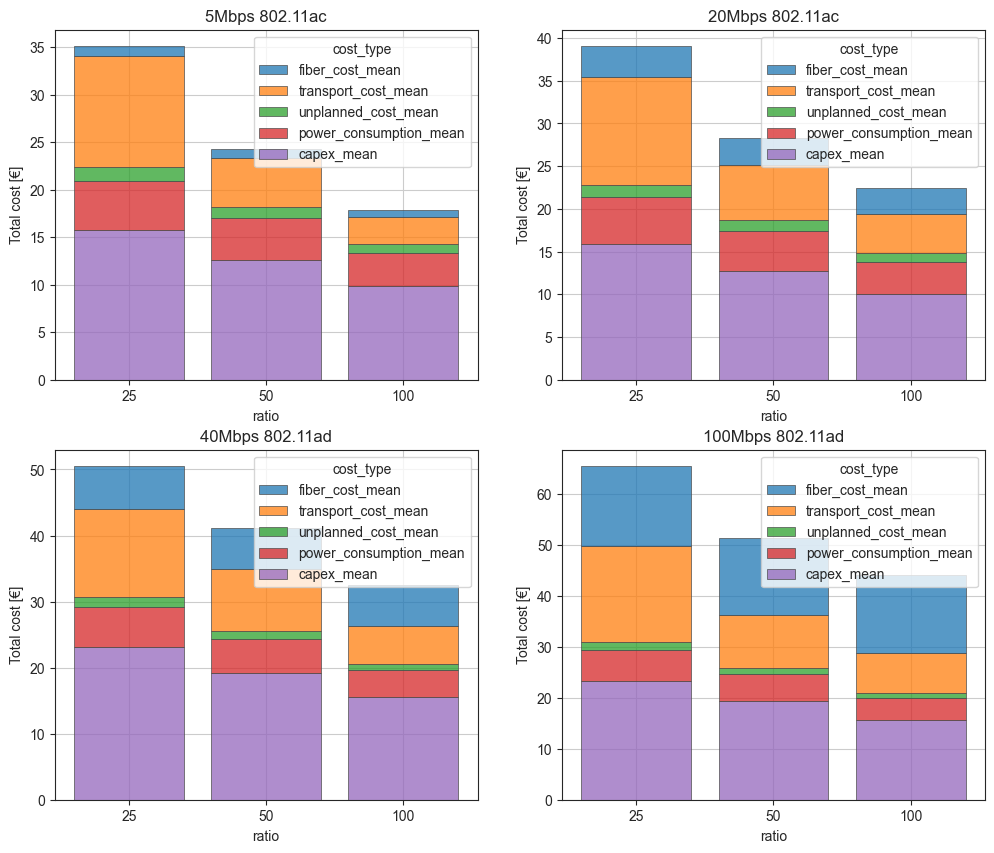

In [80]:
rotated_df = costs_df[['fiber_cost_mean', 'transport_cost_mean', 'unplanned_cost_mean', 'power_consumption_mean', 'capex_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

plt.rcParams['figure.figsize'] = [12, 10]

ax = plt.subplot(2,2,1)
sns.histplot(data=rotated_df[(rotated_df.mgb==5) & (rotated_df.device=='802.11ac') & (rotated_df.cluster_size==100)], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8, ax=ax)
ax.set_ylabel("Total cost [€]")
ax.set_title("5Mbps 802.11ac")
ax.set_ylabel("Total cost [€]")

ax = plt.subplot(2,2,2)
sns.histplot(data=rotated_df[(rotated_df.mgb==20) & (rotated_df.device=='802.11ac') & (rotated_df.cluster_size==100)], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8,  ax=ax)
ax.set_title("20Mbps 802.11ac")
ax.set_ylabel("Total cost [€]")

ax = plt.subplot(2,2,3)
sns.histplot(data=rotated_df[(rotated_df.mgb==40) & (rotated_df.device=='802.11ad_pro') & (rotated_df.cluster_size==50)], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8,  ax=ax)
ax.set_title("40Mbps 802.11ad")
ax.set_ylabel("Total cost [€]")

ax = plt.subplot(2,2,4)
sns.histplot(data=rotated_df[(rotated_df.mgb==100) & (rotated_df.device=='802.11ad_pro') & (rotated_df.cluster_size==50)], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8,  ax=ax)
ax.set_title("100Mbps 802.11ad")
ax.set_ylabel("Total cost [€]")

plt.savefig('figures/costs_acad.pdf')


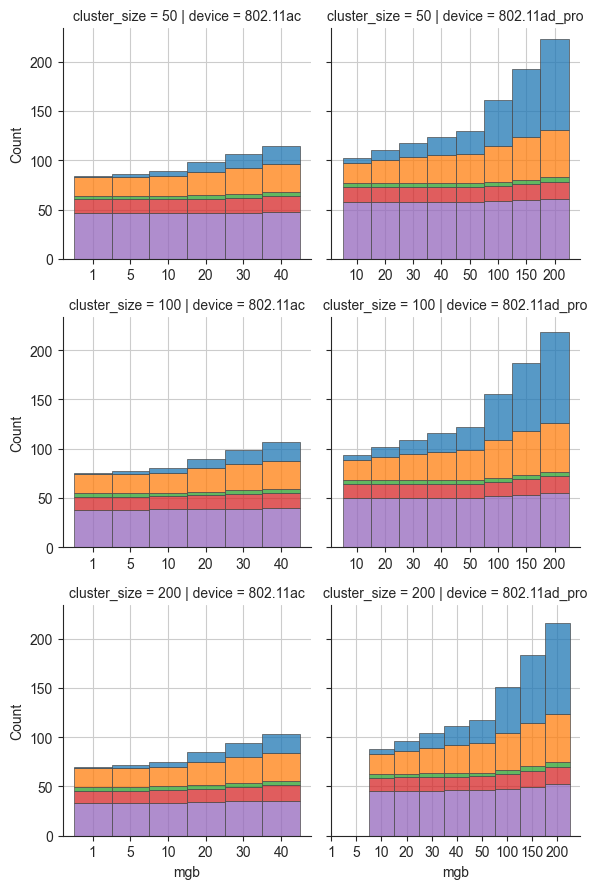

In [59]:
rotated_df = costs_df[['fiber_cost_mean', 'transport_cost_mean', 'unplanned_cost_mean', 'power_consumption_mean', 'capex_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['mgb'] = pd.Categorical(rotated_df['mgb'].astype(str), [str(x) for x in sorted(rotated_df.mgb.unique())])
fg = sns.FacetGrid(data=rotated_df, row='cluster_size', col='device', sharex=False)
fg.map_dataframe(sns.histplot, x='mgb', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value')

p = plt.xticks(rotated_df.mgb.unique())

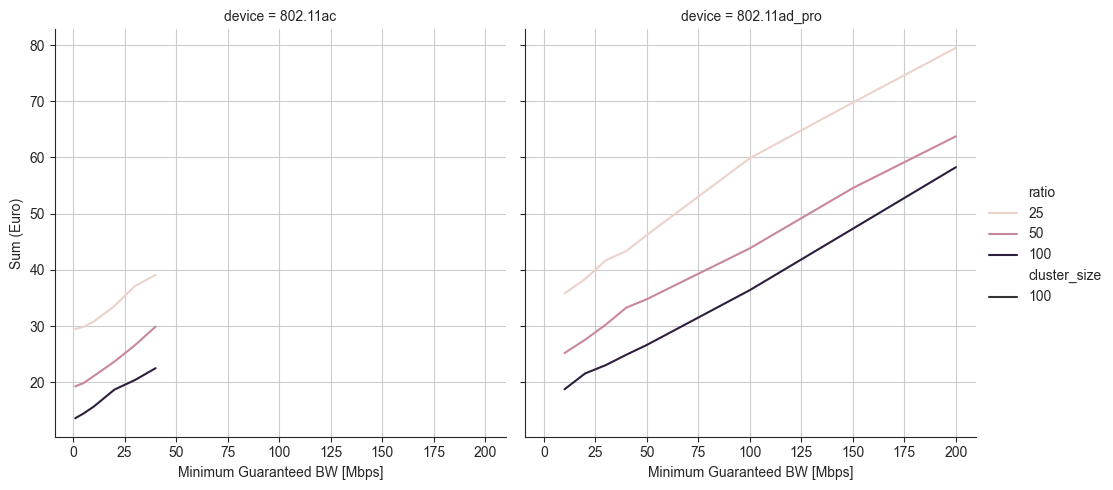

In [60]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size==100)], x='mgb', col='device', hue='ratio', y='sum', kind='line',style="cluster_size",facet_kws={'sharey': True, 'sharex': True})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/costs.pdf")

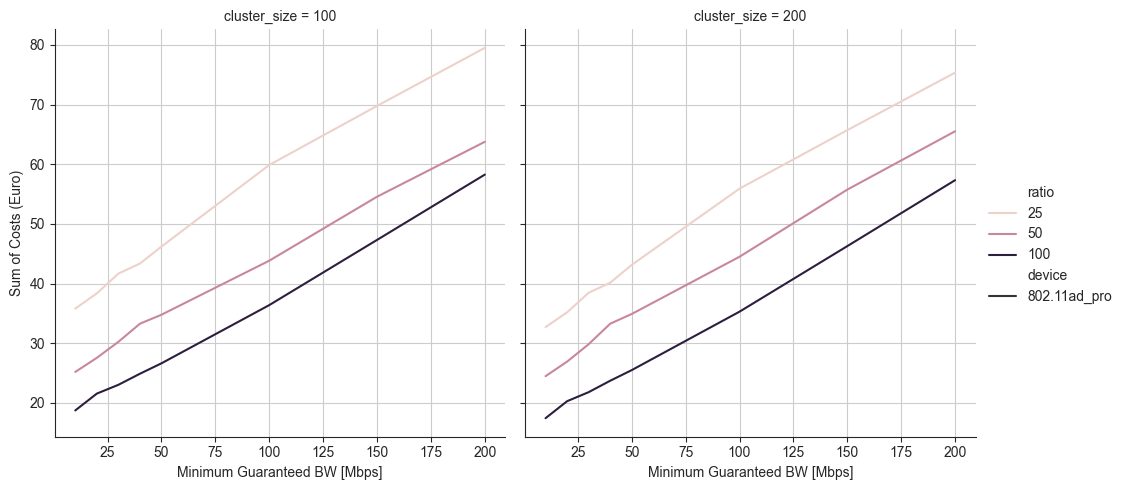

In [61]:
#sns.set_style("ticks",{'axes.grid' : True
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=100) & (costs_df.device=='802.11ad_pro')], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")
fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")



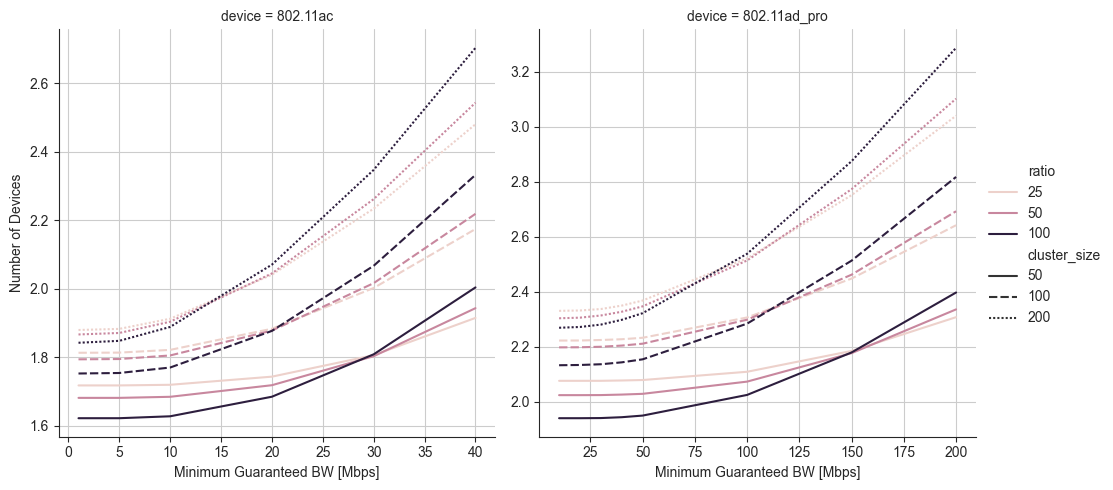

In [62]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[n_ant_df.type=='relay'], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

# axes = fg.axes.flatten()
# axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
# axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_relay.pdf")


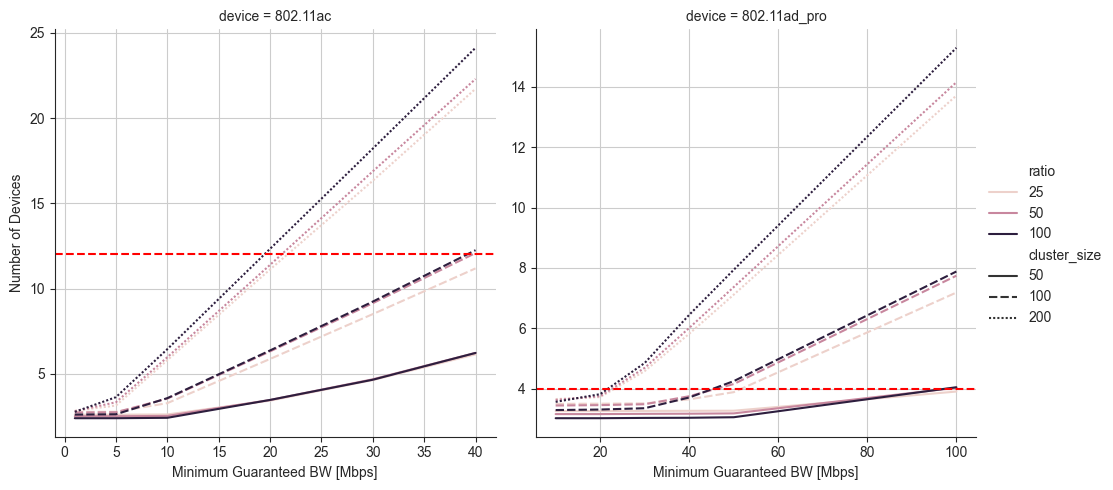

In [68]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[(n_ant_df.type=='gw') & (n_ant_df.mgb<=100)], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
axes = fg.axes.flatten()
axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
#axes[0].set_ylim(1,25)

axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")
#axes[1].set_ylim(1,16)


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_gw.pdf")




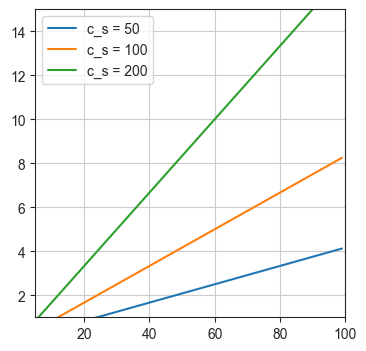

In [64]:
plt.figure(figsize=(4,4))

def get_ant(n_subs, n_gw, mgb):
    return n_subs*mgb/(n_gw*1200)

x = np.arange(0,100)

for c_s in [50,100,200]:
    y=get_ant(813,813/c_s , x)
    plt.plot(x,y, label=f"c_s = {c_s}")
    plt.xlim(5,100)
    plt.ylim(1,15)

plt.legend()

In [65]:
# We don't like this plot
# n_ant_df_local = n_ant_df[(n_ant_df.type!='leaf') & (((n_ant_df.mgb==5) & (n_ant_df.device=='802.11ac')) | ((n_ant_df.mgb==30) & (n_ant_df.device=='802.11ad_pro')))]
# fg = sns.FacetGrid(data=n_ant_df, row='mgb', col='device', sharey=False)
#fg.map_dataframe(sns.boxplot, x='type', y='antennae')
#plt.savefig("/home/gabriel/git/ODCM/analysis/figures/ant_boxplot.pdf")


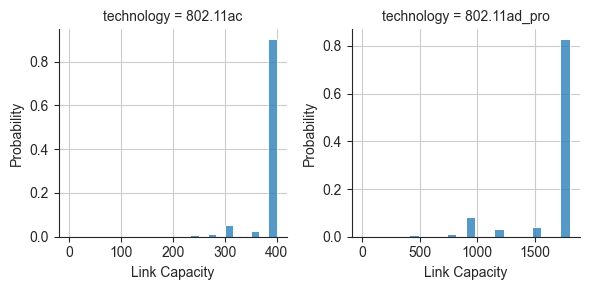

In [66]:

dfs = []
for dev in ['802.11ac', '802.11ad_pro']:
    df = pd.read_csv(f'processed/{dev}/lc.csv', names=['id', 'cap']).set_index('id')
    df['technology'] = dev
    df['Link Capacity'] = df.cap
    dfs.append(df)
df = pd.concat(dfs)

fg = sns.FacetGrid(df, col='technology', sharex=False, sharey=False)
fg.map_dataframe(sns.histplot, x='Link Capacity', stat='probability', common_norm=True)
plt.savefig('/home/gabriel/git/ODCM/analysis/figures/link_capacity_hist.pdf')